In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [71]:
train_df = pd.read_csv('penguins_train.csv')
test_df=pd.read_csv('penguins_test.csv')
train_df.head()

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Biscoe,Yes,38.8,17.2,180.0,3800.0,MALE,9.63954,-25.29856,Adelie Penguin (Pygoscelis adeliae)
1,Torgersen,Yes,41.1,18.6,189.0,3325.0,MALE,9.32277,-26.09989,Adelie Penguin (Pygoscelis adeliae)
2,Biscoe,Yes,39.0,17.5,186.0,3550.0,FEMALE,8.57199,-26.07188,Adelie Penguin (Pygoscelis adeliae)
3,Dream,No,39.7,17.9,193.0,4250.0,MALE,9.25769,-25.88798,Adelie Penguin (Pygoscelis adeliae)
4,Biscoe,Yes,47.5,14.2,209.0,4600.0,FEMALE,8.39299,-26.78733,Gentoo penguin (Pygoscelis papua)


In [72]:
# X_train = train_df.drop('Species', axis=1)
# y_train = train_df['Species']

In [73]:
#X_test=test_df

In [74]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Species', axis=1), train_df['Species'], test_size=0.7, random_state=42)

### Preprocessing Data

In [75]:
def preprocess(X_train):
    # Fill the missing values in 'Clutch Completion' column with the mode
    X_train['Clutch Completion'] = X_train['Clutch Completion'].fillna(X_train['Clutch Completion'].mode()[0])
    #X_train.drop('Sex', axis=1, inplace=True)
    X_train['Sex'] = X_train['Sex'].map({'MALE':1,'FEMALE':0})
    X_train['Sex'].fillna(X_train['Sex'].mode()[0], inplace=True)   
    # Convert the categorical 'Island' column to numerical using LabelEncoder
    le = LabelEncoder()
    X_train['Island'] = le.fit_transform(X_train['Island'])
    # Convert the 'Clutch Completion' column to numerical
    X_train['Clutch Completion'] = X_train['Clutch Completion'].map({'Yes': 1, 'No': 0})
    # Fill the missing values in numerical columns with their mean
    num_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
    X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].mean())
    # Scale the numerical columns using StandardScaler
    scaler = StandardScaler()
    X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
    return X_train
le = LabelEncoder()
X_train = preprocess(X_train)
y_train = le.fit_transform(y_train)
X_test = preprocess(X_test)
y_test = le.fit_transform(y_test)

In [76]:
X_train.head()

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
47,0,1,-0.290385,1.059696,0.036825,-0.082216,1.0,-0.457658,-0.882674
94,2,1,-0.734182,-0.028025,-0.269104,-0.775912,0.0,-0.710057,-1.202921
225,0,1,-1.067029,1.296157,-0.727997,0.195263,1.0,1.340957,-0.048094
241,0,1,0.079445,-1.730545,0.648682,0.334002,0.0,-1.256481,-1.376644
161,0,1,0.504750,-0.690116,1.184058,1.305177,1.0,-1.447162,0.368009


### Now building one-vs-one classifier

0 1
0 2
1 2


C:\Users\Anonymous\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Anonymous\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Anonymous\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Anonymous\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Anonymous\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Anonymous\AppData\Roaming\Pytho

One-vs-One SVM Classifier Accuracy: 0.9791666666666666
Confusion Matrix:
[[81  0  0]
 [ 4 39  0]
 [ 0  0 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        81
           1       1.00      0.91      0.95        43
           2       1.00      1.00      1.00        68

    accuracy                           0.98       192
   macro avg       0.98      0.97      0.98       192
weighted avg       0.98      0.98      0.98       192



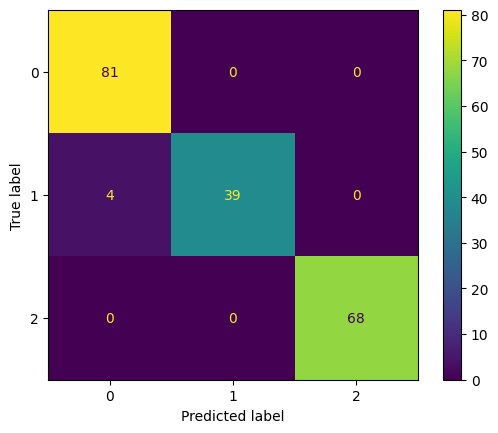

In [78]:
# to create svm classifiers for each pair of classes without inbuilt library
from sklearn.svm import SVC
from itertools import combinations
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
classes = np.unique(y_train)
svm_classifiers = {}
for c1, c2 in combinations(classes,2):
    print(c1,c2)
    X_train_pair=X_train[(y_train==c1) | (y_train==c2)]
    y_train_pair=y_train[(y_train==c1) | (y_train==c2)]
    svm=SVC(kernel='linear')
    svm.fit(X_train_pair,y_train_pair)
    svm_classifiers[(c1,c2)]=svm

# to predict the class of each test data point
y_pred_ovo=[]
for i, row in X_test.iterrows():
    votes=np.zeros(len(classes))
    for (c1,c2), svm in svm_classifiers.items():
        if svm.predict([row.values])==c1:
            votes[np.where(classes==c1)]+=1
        else:
            votes[np.where(classes==c2)]+=1
    y_pred_ovo.append(classes[np.argmax(votes)])

acc_ovo=accuracy_score(y_test,y_pred_ovo)
# Print the accuracy of the classifier
print(f"One-vs-One SVM Classifier Accuracy: {acc_ovo}")

# Print the confusion matrix, precision, recall, and F1 score metrics
cm = confusion_matrix(y_test, y_pred_ovo, labels=classes)
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_ovo, labels=classes)}")

# Plot the confusion matrix
# plot_confusion_matrix(svm, X_test, y_test, labels=classes)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ovo, labels=classes)
plt.show()
#should output predicted labels in a new file named ovo.csv
pd.DataFrame({"predicted":y_pred_ovo}).to_csv("ovo.csv", header=True, index=None)